<a href="https://colab.research.google.com/github/github876545678/github876545678/blob/main/Bilet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bilet 2 Sual 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/cips_sales - cips_sales.csv')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17.10.2018,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0
1,14.05.2019,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3
2,20.05.2019,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,17.08.2018,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,18.08.2018,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8
...,...,...,...,...,...,...,...,...
43689,16.06.2019,123.0,123240.0,127057.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2.0,9.2
43690,09.12.2018,123.0,123269.0,127180.0,75.0,Cobs Popd Sea Salt Chips 110g,2.0,7.6
43691,01.03.2019,123.0,123269.0,127181.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8
43692,29.04.2019,123.0,123269.0,127182.0,17.0,Kettle Sensations BBQ&Maple 150g,2.0,9.2


In [ ]:
df.isnull().sum()


,0
DATE,0
STORE_NBR,43
LYLTY_CARD_NBR,1
TXN_ID,1
PROD_NBR,1
PROD_NAME,1
PROD_QTY,134
TOT_SALES,1


In [ ]:
df.dtypes


,0
DATE,object
STORE_NBR,float64
LYLTY_CARD_NBR,float64
TXN_ID,float64
PROD_NBR,float64
PROD_NAME,object
PROD_QTY,float64
TOT_SALES,float64


In [ ]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,43651.000000,4.369300e+04,4.369300e+04,43693.000000,43560.000000,43693.000000
mean,118.489153,1.189577e+05,1.183092e+05,56.426567,1.904959,7.315053
std,74.713932,7.870209e+04,7.685548e+04,32.862239,0.353996,2.564526
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,58.000000,5.900000e+04,5.460200e+04,28.000000,2.000000,5.400000
50%,105.000000,1.051790e+05,1.063630e+05,55.000000,2.000000,7.400000
75%,179.000000,1.791790e+05,1.804440e+05,85.000000,2.000000,9.200000
max,272.000000,2.370651e+06,2.415841e+06,114.000000,5.000000,29.500000


<ipython-input-6-9ea05d61ccf7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[col] = pd.to_numeric(selected_df[col], errors='coerce')


<Axes: >

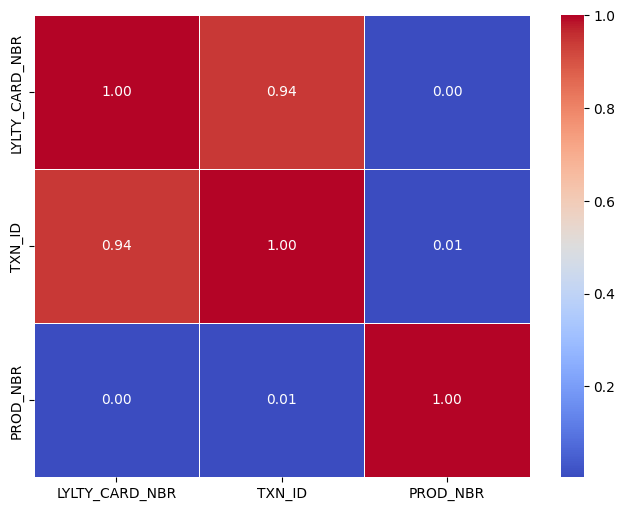

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR']

selected_df = df[selected_columns]

for col in selected_columns:
    selected_df[col] = pd.to_numeric(selected_df[col], errors='coerce')


correlation_matrix = selected_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)



In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

df_cleaned_iqr = df[~outliers_iqr.any(axis=1)]

print("IQR ilə təmizlənmiş cədvəl:")
print(df_cleaned_iqr)

IQR ilə təmizlənmiş cədvəl:
             DATE  STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR  \
0      17.10.2018        1.0          1000.0       1.0       5.0   
2      20.05.2019        1.0          1343.0     383.0      61.0   
9      18.08.2018        7.0          7150.0    6900.0      52.0   
12     18.05.2019        9.0          9208.0    8634.0      15.0   
24     15.08.2018       38.0         38142.0   34181.0     108.0   
...           ...        ...             ...       ...       ...   
43689  16.06.2019      123.0        123240.0  127057.0     108.0   
43690  09.12.2018      123.0        123269.0  127180.0      75.0   
43691  01.03.2019      123.0        123269.0  127181.0     102.0   
43692  29.04.2019      123.0        123269.0  127182.0      17.0   
43693    10.07.20        NaN             NaN       NaN       NaN   

                                      PROD_NAME  PROD_QTY  TOT_SALES  
0        Natural Chip        Compny SeaSalt175g       2.0        6.0  
2        Smit

Bilet 2 Sual 2

In [ ]:

it_subjects = ['Pytion', 'Sql', 'Tabloau']

it_subjects[0] = 'Python'.upper()

it_subjects.insert(1, 'R')

it_subjects.pop()

print(it_subjects)


['PYTHON', 'R', 'Sql']


BIlet 2 Sual 3

In [ ]:
# Müştəridən məlumatları alırıq
salary = float(input("Maaşınızı daxil edin: "))
debt = float(input("Aylıq ümumi borc ödənişinizi daxil edin: "))

# DTİ (Debt-to-Income) hesablama
dti = debt / salary * 100

# DTİ qiymətini yoxlayaq
if dti > 50:
    # DTİ 50%-dən çoxdursa, yaş soruşuruq
    age = int(input("Yaşınızı daxil edin: "))

    if age > 65:
        print("Kredit verə bilmərik, çünki yaşınız 65-dən böyükdür.")
    else:
        print("Kredit verə bilərik, çünki yaşınız 65-dən azdır.")
else:
    # DTİ 50%-dən azdırlarsa, kredit verə biləcəyini bildiririk
    print("Kredit verə bilərik, çünki DTİ 50%-dən azdır.")


Maaşınızı daxil edin: 500
Aylıq ümumi borc ödənişinizi daxil edin: 1200
Yaşınızı daxil edin: 22
Kredit verə bilərik, çünki yaşınız 65-dən azdır.


Bilet 2 Sual 4

In [ ]:
# Verilən list
numbers = [12, 33, 55, 23, 54]

# 11-ə bölünən ədədləri seçirik
divisible_by_11 = list(filter(lambda x: x % 11 == 0, numbers))

# Yeni listdəki ədədlərin 11-ə nisbətini tapırıq
ratios = list(map(lambda x: x / 11, divisible_by_11))

# Nəticələri çap edirik
print("11-ə bölünən ədədlər:", divisible_by_11)
print("11-ə nisbətləri:", ratios)


11-ə bölünən ədədlər: [33, 55]
11-ə nisbətləri: [3.0, 5.0]


Bilet 1 Sual 5

In [ ]:
import random

# Kompüterin 1-dən 100-ə qədər bir rəqəm seçməsi
target_number = random.randint(1, 100)

# Cəhddərin sayını sıfırlayırıq
attempts = 0

# İstifadəçinin təxmin etməsi
while True:
    # İstifadəçidən təxmin alırıq
    guess = int(input("1-dən 100-ə qədər bir rəqəm təxmin edin: "))

    # Cəhddərin sayını artırırıq
    attempts += 1

    # Təxminin düzgün olub-olmaması
    if guess < target_number:
        print("Daha böyük bir rəqəm təxmin edin.")
    elif guess > target_number:
        print("Daha kiçik bir rəqəm təxmin edin.")
    else:
        print(f"Təbriklər! Doğru cavabı {target_number} tapdınız. {attempts} cəhddə tapdınız.")
        break


1-dən 100-ə qədər bir rəqəm təxmin edin: 81
Daha böyük bir rəqəm təxmin edin.
1-dən 100-ə qədər bir rəqəm təxmin edin: 89
Təbriklər! Doğru cavabı 89 tapdınız. 2 cəhddə tapdınız.
